In [10]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from gpflow.utilities import print_summary

# The lines below are specific to the notebook format
%matplotlib inline

plt.style.use('ggplot')

In [11]:
def binh_korn(x, y):  # pylint:disable=invalid-name
    """https://en.wikipedia.org/wiki/Test_functions_for_optimization"""
    obj1 = 4 * x ** 2 + 4 * y ** 2
    obj2 = (x - 5) ** 2 + (y - 5) ** 2
    return -obj1, -obj2


def binh_korn_points():
    """Create a dataset based on the Binh-Korn test function"""
    x = np.linspace(0, 5, 100)  # pylint:disable=invalid-name
    y = np.linspace(0, 3, 100)  # pylint:disable=invalid-name
    array = np.array([binh_korn(xi, yi) for xi, yi in zip(x, y)])
    return np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)]), array

In [12]:
x, points = binh_korn_points()

Text(0, 0.5, 'objective 2')

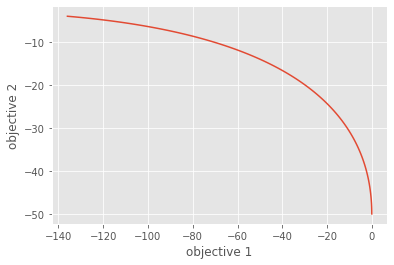

In [13]:
plt.plot(points[:,0], points[:,1])
plt.xlabel('objective 1')
plt.ylabel('objective 2')

In [43]:
x = (x - x.mean()) / x.std()
points = (points - points.mean()) / points.std()

In [61]:
indices = np.random.choice(range(len(x)), 20)

In [44]:
k = gpflow.kernels.RationalQuadratic()

In [62]:
m = gpflow.models.GPR(data=(x[indices], points[indices]), kernel=k, mean_function=None)

In [63]:
opt = gpflow.optimizers.Scipy()

In [64]:
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=10000))

In [65]:
opt_logs

      fun: -172.66386574809877
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.81214986e-06, -1.56898375e-04,  3.27001326e-05,  1.13801794e-02])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 92
      nit: 9
     njev: 92
   status: 0
  success: True
        x: array([4571.19693555,   26.02637078, 5668.52441827,  -21.0171565 ])

In [66]:
mean, var = m.predict_f(x)

<ErrorbarContainer object of 3 artists>

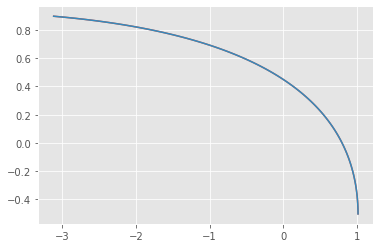

In [70]:
plt.plot(mean[:,0], mean[:,1])
plt.errorbar(mean[:,0], mean[:,1], var[:,1], var[:,0])
#plt.plot(points[:,0], points[:,1])